<center>
<h1>
Assignment 8<br>
    Data Visualization I<br>
</h1>
   </center>
<h6>Name :Vrushaket Chaudhari<br>
    Roll No : 31305<br>
    Class : TE3<br>
    Batch : K3<br>
    Subject : DSBDAL
</h6>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.drop('Cabin',axis = 1, inplace = True)
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
df.Sex.unique()
print("Number of Records grouped by Gender:\n ")
print(df.groupby(["Sex"])["PassengerId"].count())

Number of Records grouped by Gender:
 
Sex
female    314
male      577
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

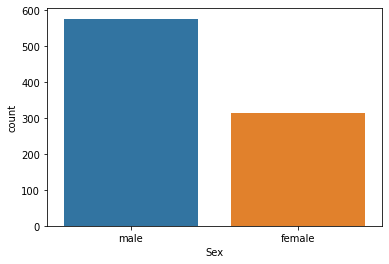

In [ ]:
#sns.factorplot('Sex',data = df, kind = 'count')
sns.countplot(x = 'Sex',data = df)

In [ ]:
print("Number of Records grouped by Pclass record:\n ")
print(df.groupby(["Pclass"])["PassengerId"].count())

Number of Records grouped by Pclass record:
 
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


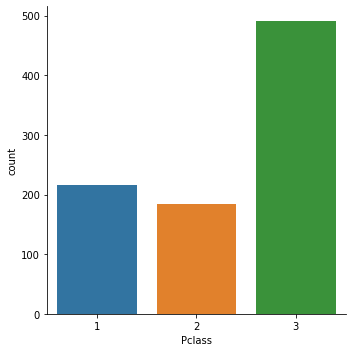

In [ ]:
sns.factorplot('Pclass',data = df, kind = 'count')

In [ ]:
print(df.groupby(["SibSp"])["PassengerId"].count())

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64


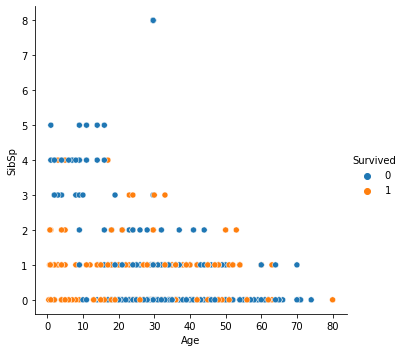

In [ ]:
sns.relplot(x = "Age",y = "SibSp", hue = "Survived",data = df)

In [ ]:
print(df.groupby(["Parch"])["PassengerId"].count())

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64


In [ ]:
print("Number of Records grouped by Survival record:\n ")
print(df.groupby(["Survived"])["PassengerId"].count())

Number of Records grouped by Survival record:
 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


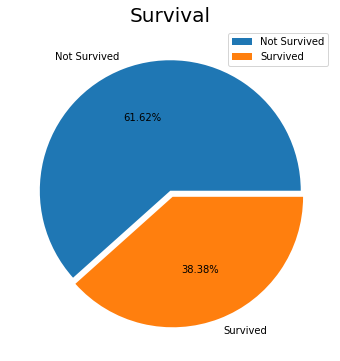

In [ ]:
labels = ['Not Survived', 'Survived']
size = df['Survived'].value_counts()
explode = [0, 0.05]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Survival', fontsize = 20)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

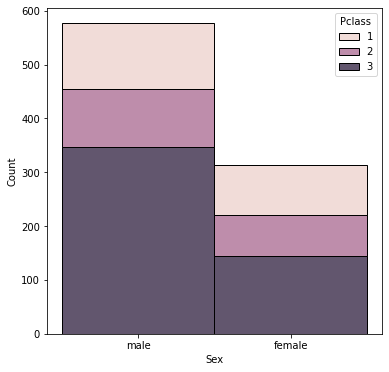

In [ ]:
sns.histplot(x = "Sex", hue = "Pclass",data = df, multiple = 'stack')

#### Adding extra column for children

In [ ]:
def children(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(children,axis = 1)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


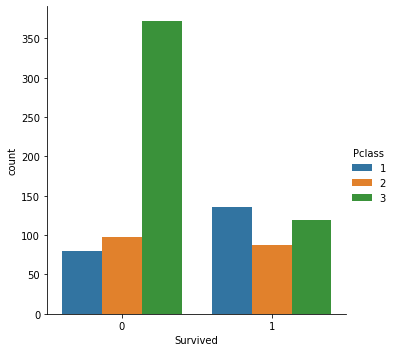

In [ ]:
sns.factorplot('Survived', data = df, kind = 'count', hue = 'Pclass')

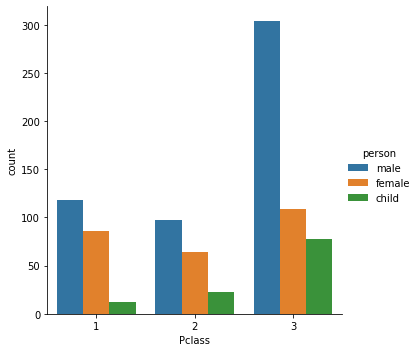

In [ ]:
sns.factorplot('Pclass', data = df, hue = 'person', kind = 'count')

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

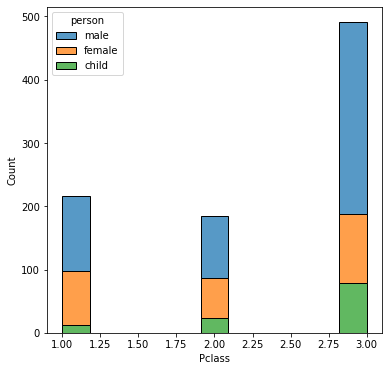

In [ ]:
sns.histplot(x = 'Pclass', hue = 'person', data = df, multiple = 'stack')

<AxesSubplot:xlabel='person', ylabel='Count'>

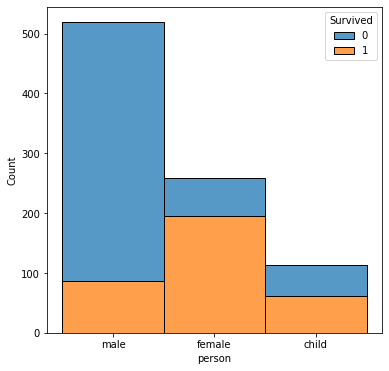

In [ ]:
sns.histplot(x='person', hue = 'Survived', multiple = 'stack', data = df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

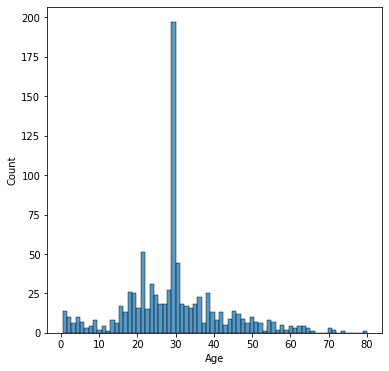

In [ ]:
sns.histplot(x = 'Age',data = df, bins = 70)

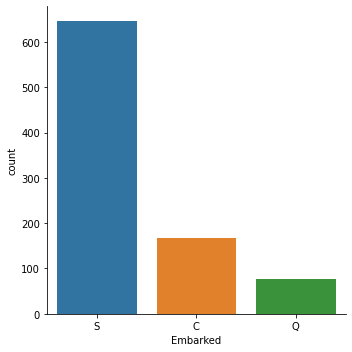

In [ ]:
sns.factorplot('Embarked', data = df, kind = 'count')

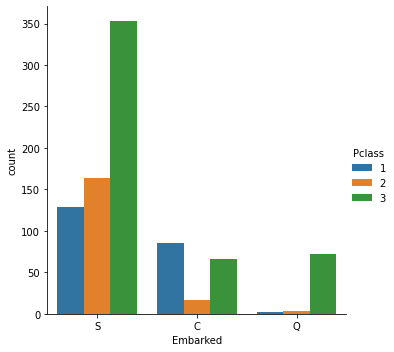

In [ ]:
sns.factorplot('Embarked', data = df, hue = 'Pclass', kind = 'count')

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

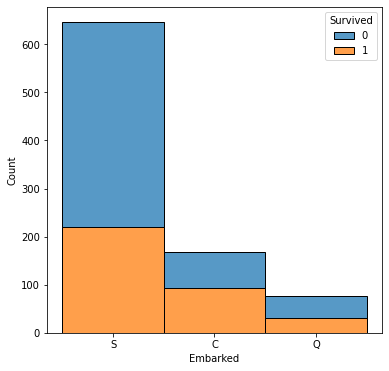

In [ ]:
sns.histplot(x='Embarked', hue = 'Survived', multiple = 'stack', data = df)

In [ ]:
df['Alone'] = df.Parch + df.SibSp
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

In [ ]:
print("Number of Records with or without family:\n ")
print(df.groupby(["Alone"])["PassengerId"].count())

Number of Records with or without family:
 
Alone
With Family       354
Without Family    537
Name: PassengerId, dtype: int64


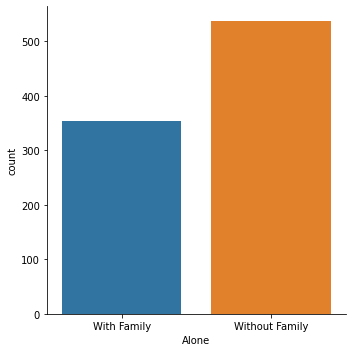

In [ ]:
sns.factorplot('Alone', kind = 'count', data = df)

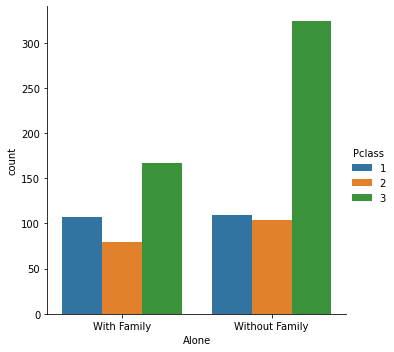

In [ ]:
sns.factorplot('Alone', kind = 'count', data = df, hue = 'Pclass')

<AxesSubplot:xlabel='Alone', ylabel='Count'>

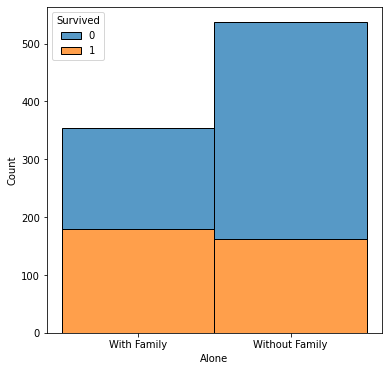

In [ ]:
sns.histplot(x='Alone', hue = 'Survived', multiple = 'stack', data = df)

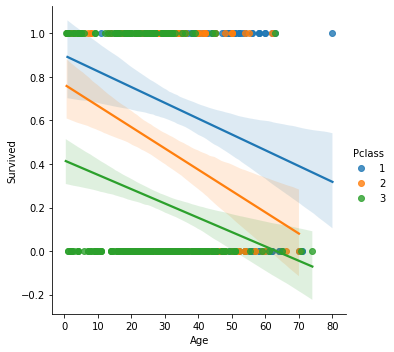

In [ ]:
sns.lmplot('Age','Survived', data = df, hue = 'Pclass')

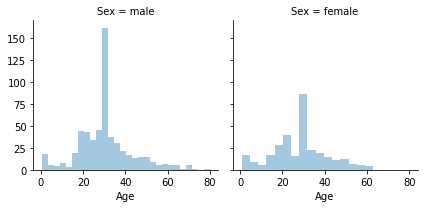

In [ ]:
g = sns.FacetGrid(data = df, col = 'Sex')
g.map(sns.distplot, 'Age', kde = False)

#### Heatmap to show correlation between all columns
##### This heatmap indicated the co-relation between fare and survived is strong

<AxesSubplot:>

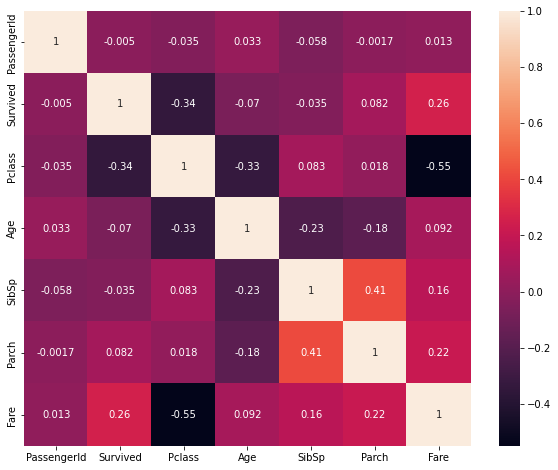

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.corr(), annot = True,)

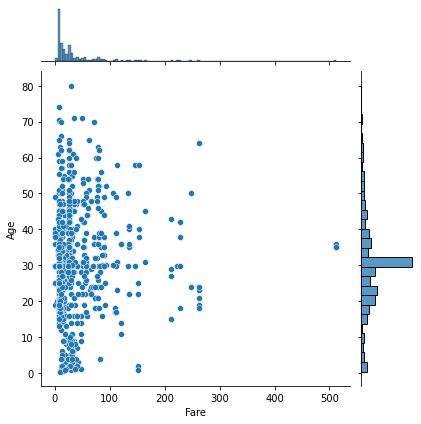

In [ ]:
sns.jointplot(x = 'Fare', y = 'Age', data = df)